# To solve the question: "What's the relationship between the HOXB13 Gene      and Porstate Cancer when considering the influence of age?"

In [1]:

!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np

# Use double backslashes or a raw string for the file paths
clinical_data = pd.read_csv('C:\\Users\\张宇强\\Desktop\\TCGA.PRAD.sampleMap_PRAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)


In [10]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_PRAD_PDMRNAseq,_GENOMIC_ID_TCGA_PRAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_PRAD_RPPA,_GENOMIC_ID_TCGA_PRAD_gistic2,_GENOMIC_ID_TCGA_PRAD_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_PRAD_PDMRNAseqCNV,_GENOMIC_ID_data/public/TCGA/PRAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PRAD_mutation_bcm_gene,_GENOMIC_ID_TCGA_PRAD_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_PRAD_exp_HiSeqV2_PANCAN
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,TCGA-2A-A8VL,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,51,TCGA-2A-A8VL-F71759,TCGA-2A-A8VL,...,TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,1487FD23-ED22-4942-86D6-CF19837F63B9,TCGA-2A-A8VL-01A-21D-A376-01,e10fe58f-7ceb-4ad8-bce3-5ffbefc05cb5,TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,NaN,TCGA-2A-A8VL-01A-21D-A377-08,e10fe58f-7ceb-4ad8-bce3-5ffbefc05cb5
TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,TCGA-2A-A8VO,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,57,TCGA-2A-A8VO-F71780,TCGA-2A-A8VO,...,TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,FF23B458-D1F8-4001-A8E3-7F8785435C76,TCGA-2A-A8VO-01A-11D-A376-01,20a779a3-04ab-4080-b11d-ed7b22fcd2da,TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,NaN,TCGA-2A-A8VO-01A-11D-A377-08,20a779a3-04ab-4080-b11d-ed7b22fcd2da
TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,TCGA-2A-A8VT,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,47,TCGA-2A-A8VT-F71798,TCGA-2A-A8VT,...,TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,931CEBFB-011C-4797-8E05-8012D3ADC601,TCGA-2A-A8VT-01A-11D-A376-01,2e80aebe-77b5-496c-bde9-494b9b94ee3f,TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,NaN,TCGA-2A-A8VT-01A-11D-A377-08,2e80aebe-77b5-496c-bde9-494b9b94ee3f
TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,TCGA-2A-A8VV,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,52,TCGA-2A-A8VV-F71800,TCGA-2A-A8VV,...,TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,443A2276-226E-4D27-936C-3B25B14E7121,TCGA-2A-A8VV-01A-11D-A376-01,45eca81f-9ce2-4de6-b970-65959d76398c,TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,NaN,TCGA-2A-A8VV-01A-11D-A377-08,45eca81f-9ce2-4de6-b970-65959d76398c
TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,TCGA-2A-A8VX,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,70,TCGA-2A-A8VX-F71804,TCGA-2A-A8VX,...,TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,1A003DC8-7045-4F90-A768-F2E88FE31242,TCGA-2A-A8VX-01A-11D-A376-01,0ff237d2-9283-44c7-bfae-c2020c73b94c,TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,NaN,NaN,0ff237d2-9283-44c7-bfae-c2020c73b94c


In [11]:
gene_data.head()

,TCGA-XJ-A83F-01,TCGA-G9-6348-01,TCGA-CH-5766-01,TCGA-EJ-A65G-01,TCGA-G9-6354-01,TCGA-EJ-5527-01,TCGA-HC-8213-01,TCGA-Y6-A9XI-01,TCGA-EJ-7125-11,TCGA-CH-5744-01,...,TCGA-HC-A6AP-01,TCGA-EJ-7317-01,TCGA-YL-A8S9-01,TCGA-KK-A8IA-01,TCGA-G9-6356-01,TCGA-YL-A8SO-01,TCGA-J4-A67Q-01,TCGA-KK-A6E4-01,TCGA-KK-A7B0-01,TCGA-EJ-5511-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.508592,-0.991092,-1.305892,-0.655492,-0.812592,-1.094092,-1.309592,-0.776192,-1.374692,-0.419892,...,0.125308,-0.032392,-0.359992,-0.956392,-0.217392,-0.661192,-0.174092,-1.288292,-0.155192,-0.597492
HIF3A,-0.403026,0.350174,-0.583126,1.224774,-0.203626,0.043074,-1.760026,-0.800826,1.367774,-0.698226,...,1.855274,0.802274,-2.286126,-0.656726,0.810974,0.291574,3.075474,-0.107326,0.543874,0.259674
RNF17,-0.531035,-0.130235,0.226365,-0.531035,-0.531035,2.024365,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.105435,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.688028,0.576228,0.517428,0.192528,0.819728,0.020728,0.627928,0.457128,-0.214872,0.588328,...,0.317228,0.500528,-0.038372,0.363228,0.402928,0.751828,0.271328,0.145228,0.722628,0.130728
RNF11,0.159522,0.566922,1.018822,0.346722,0.394322,0.736222,0.456522,0.717622,1.105822,0.418322,...,-0.142478,0.297922,0.210822,0.288122,0.125422,0.313122,-0.021078,-0.730078,-1.095478,-0.108478


In [19]:
gene_fullname = 'HOXB13 Gene'
gene = 'HOXB13'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Porstate Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 104 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-XJ-A83F-01,-0.508592,-0.403026,-0.531035,0.688028,0.159522,0.08799,0.205806,0.300254,-0.423399,0.148528,...,-0.074678,0.171083,-0.851933,-1.28139,-0.048977,0.593414,-0.607127,0.052105,2.504067,1.121088
TCGA-G9-6348-01,-0.991092,0.350174,-0.130235,0.576228,0.566922,0.09529,-0.268694,0.837554,-0.022599,0.818828,...,-0.348078,-0.397617,0.034667,-1.28139,-0.478977,1.177014,0.573873,0.165405,3.708167,0.527588
TCGA-CH-5766-01,-1.305892,-0.583126,0.226365,0.517428,1.018822,0.72689,-0.140194,0.107254,-0.423399,1.052328,...,-0.321078,-1.159317,-0.620433,-1.28139,0.076423,-0.595786,-1.370627,-0.766995,2.112067,0.724388
TCGA-EJ-A65G-01,-0.655492,1.224774,-0.531035,0.192528,0.346722,0.82129,0.026706,-0.903046,-0.423399,0.642228,...,-0.748878,-0.477317,-3.815633,-1.28139,-0.735477,0.512014,-1.972527,-0.453095,1.603467,1.240688
TCGA-G9-6354-01,-0.812592,-0.203626,-0.531035,0.819728,0.394322,0.14839,-0.028994,-0.281746,-0.423399,-0.149472,...,-0.748878,-0.937417,-1.506333,-1.28139,-0.655977,0.318114,-1.712427,0.118905,0.915667,1.372188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-YL-A8SO-01,-0.661192,0.291574,-0.531035,0.751828,0.313122,0.23209,0.487806,0.827654,-0.423399,-0.026772,...,-0.748878,-1.587117,-0.930333,-0.66479,-0.387977,0.596014,-0.361027,-0.149995,2.572867,0.647688
TCGA-J4-A67Q-01,-0.174092,3.075474,-0.531035,0.271328,-0.021078,-0.56581,-0.152994,2.841754,-0.423399,-2.375372,...,-0.014978,-1.587117,1.009767,-1.28139,-1.086977,2.632214,0.016873,0.107905,2.874767,0.725488
TCGA-KK-A6E4-01,-1.288292,-0.107326,-0.531035,0.145228,-0.730078,-0.02031,-0.276594,0.330254,-0.423399,0.609628,...,-0.748878,-1.587117,-0.698533,-1.28139,-1.233077,-0.094786,-1.834327,-1.133395,1.731367,0.960288
TCGA-KK-A7B0-01,-0.155192,0.543874,-0.531035,0.722628,-1.095478,-0.64521,0.275706,2.191354,-0.423399,0.722528,...,1.122422,-0.972017,1.241667,-1.28139,-0.761777,1.314914,-0.463727,1.189105,3.301067,0.793188


In [20]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,TCGA-2A-A8VL-01,TCGA-2A-A8VL,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,51,TCGA-2A-A8VL-F71759,TCGA-2A-A8VL,...,-0.149678,-0.565717,-1.980333,-1.28139,-0.440177,1.163814,-1.480327,-0.571195,1.802067,1.151488
TCGA-2A-A8VO-01,TCGA-2A-A8VO-01,TCGA-2A-A8VO,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,57,TCGA-2A-A8VO-F71780,TCGA-2A-A8VO,...,1.122422,0.731283,-1.019233,-1.28139,-0.325877,0.675314,-0.336327,-0.120095,2.618067,0.785288
TCGA-2A-A8VT-01,TCGA-2A-A8VT-01,TCGA-2A-A8VT,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,47,TCGA-2A-A8VT-F71798,TCGA-2A-A8VT,...,-0.748878,-0.282217,-1.477333,-1.28139,-1.004377,-0.853486,-0.619527,-0.764495,1.723367,0.400188
TCGA-2A-A8VV-01,TCGA-2A-A8VV-01,TCGA-2A-A8VV,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,52,TCGA-2A-A8VV-F71800,TCGA-2A-A8VV,...,-0.748878,-0.630117,-1.643033,-1.28139,-0.389677,0.959814,-1.920727,-0.447995,2.168967,0.419888
TCGA-2A-A8VX-01,TCGA-2A-A8VX-01,TCGA-2A-A8VX,TCGA Prostate Cancer (PRAD),prostate adenocarcinoma,Prostate,NaN,NaN,70,TCGA-2A-A8VX-F71804,TCGA-2A-A8VX,...,0.579622,-0.998517,-2.466333,-1.28139,-0.421977,0.017714,-3.027827,-1.182695,-0.682033,0.891288


In [21]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]


threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,-18658.0,-0.529292,1.057174,-0.531035,0.618328,0.190622,0.81449,0.190406,0.636354,-0.423399,...,-0.149678,-0.565717,-1.980333,-1.28139,-0.440177,1.163814,-1.480327,-0.571195,1.802067,1.151488
TCGA-2A-A8VO-01,-20958.0,-0.758992,1.607474,-0.531035,0.457328,-0.006778,0.08739,0.116506,0.655854,-0.423399,...,1.122422,0.731283,-1.019233,-1.28139,-0.325877,0.675314,-0.336327,-0.120095,2.618067,0.785288
TCGA-2A-A8VT-01,-17365.0,-0.205792,-0.895626,-0.531035,0.330028,0.326922,0.00119,0.008406,-0.469046,0.371801,...,-0.748878,-0.282217,-1.477333,-1.28139,-1.004377,-0.853486,-0.619527,-0.764495,1.723367,0.400188
TCGA-2A-A8VV-01,-19065.0,-0.697292,1.133574,-0.531035,0.807328,-0.273778,0.17979,0.243206,-0.175046,-0.423399,...,-0.748878,-0.630117,-1.643033,-1.28139,-0.389677,0.959814,-1.920727,-0.447995,2.168967,0.419888
TCGA-2A-A8VX-01,-25904.0,-0.847392,1.244074,-0.531035,0.677428,0.161422,0.57909,0.142406,-1.165446,0.165201,...,0.579622,-0.998517,-2.466333,-1.28139,-0.421977,0.017714,-3.027827,-1.182695,-0.682033,0.891288


In [22]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Porstate Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,-18658.0,-0.529292,1.057174,-0.531035,0.618328,0.190622,0.81449,0.190406,0.636354,-0.423399,...,-0.565717,-1.980333,-1.28139,-0.440177,1.163814,-1.480327,-0.571195,1.802067,1.151488,1
TCGA-2A-A8VO-01,-20958.0,-0.758992,1.607474,-0.531035,0.457328,-0.006778,0.08739,0.116506,0.655854,-0.423399,...,0.731283,-1.019233,-1.28139,-0.325877,0.675314,-0.336327,-0.120095,2.618067,0.785288,1
TCGA-2A-A8VT-01,-17365.0,-0.205792,-0.895626,-0.531035,0.330028,0.326922,0.00119,0.008406,-0.469046,0.371801,...,-0.282217,-1.477333,-1.28139,-1.004377,-0.853486,-0.619527,-0.764495,1.723367,0.400188,1
TCGA-2A-A8VV-01,-19065.0,-0.697292,1.133574,-0.531035,0.807328,-0.273778,0.17979,0.243206,-0.175046,-0.423399,...,-0.630117,-1.643033,-1.28139,-0.389677,0.959814,-1.920727,-0.447995,2.168967,0.419888,1
TCGA-2A-A8VX-01,-25904.0,-0.847392,1.244074,-0.531035,0.677428,0.161422,0.57909,0.142406,-1.165446,0.165201,...,-0.998517,-2.466333,-1.28139,-0.421977,0.017714,-3.027827,-1.182695,-0.682033,0.891288,1


In [23]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

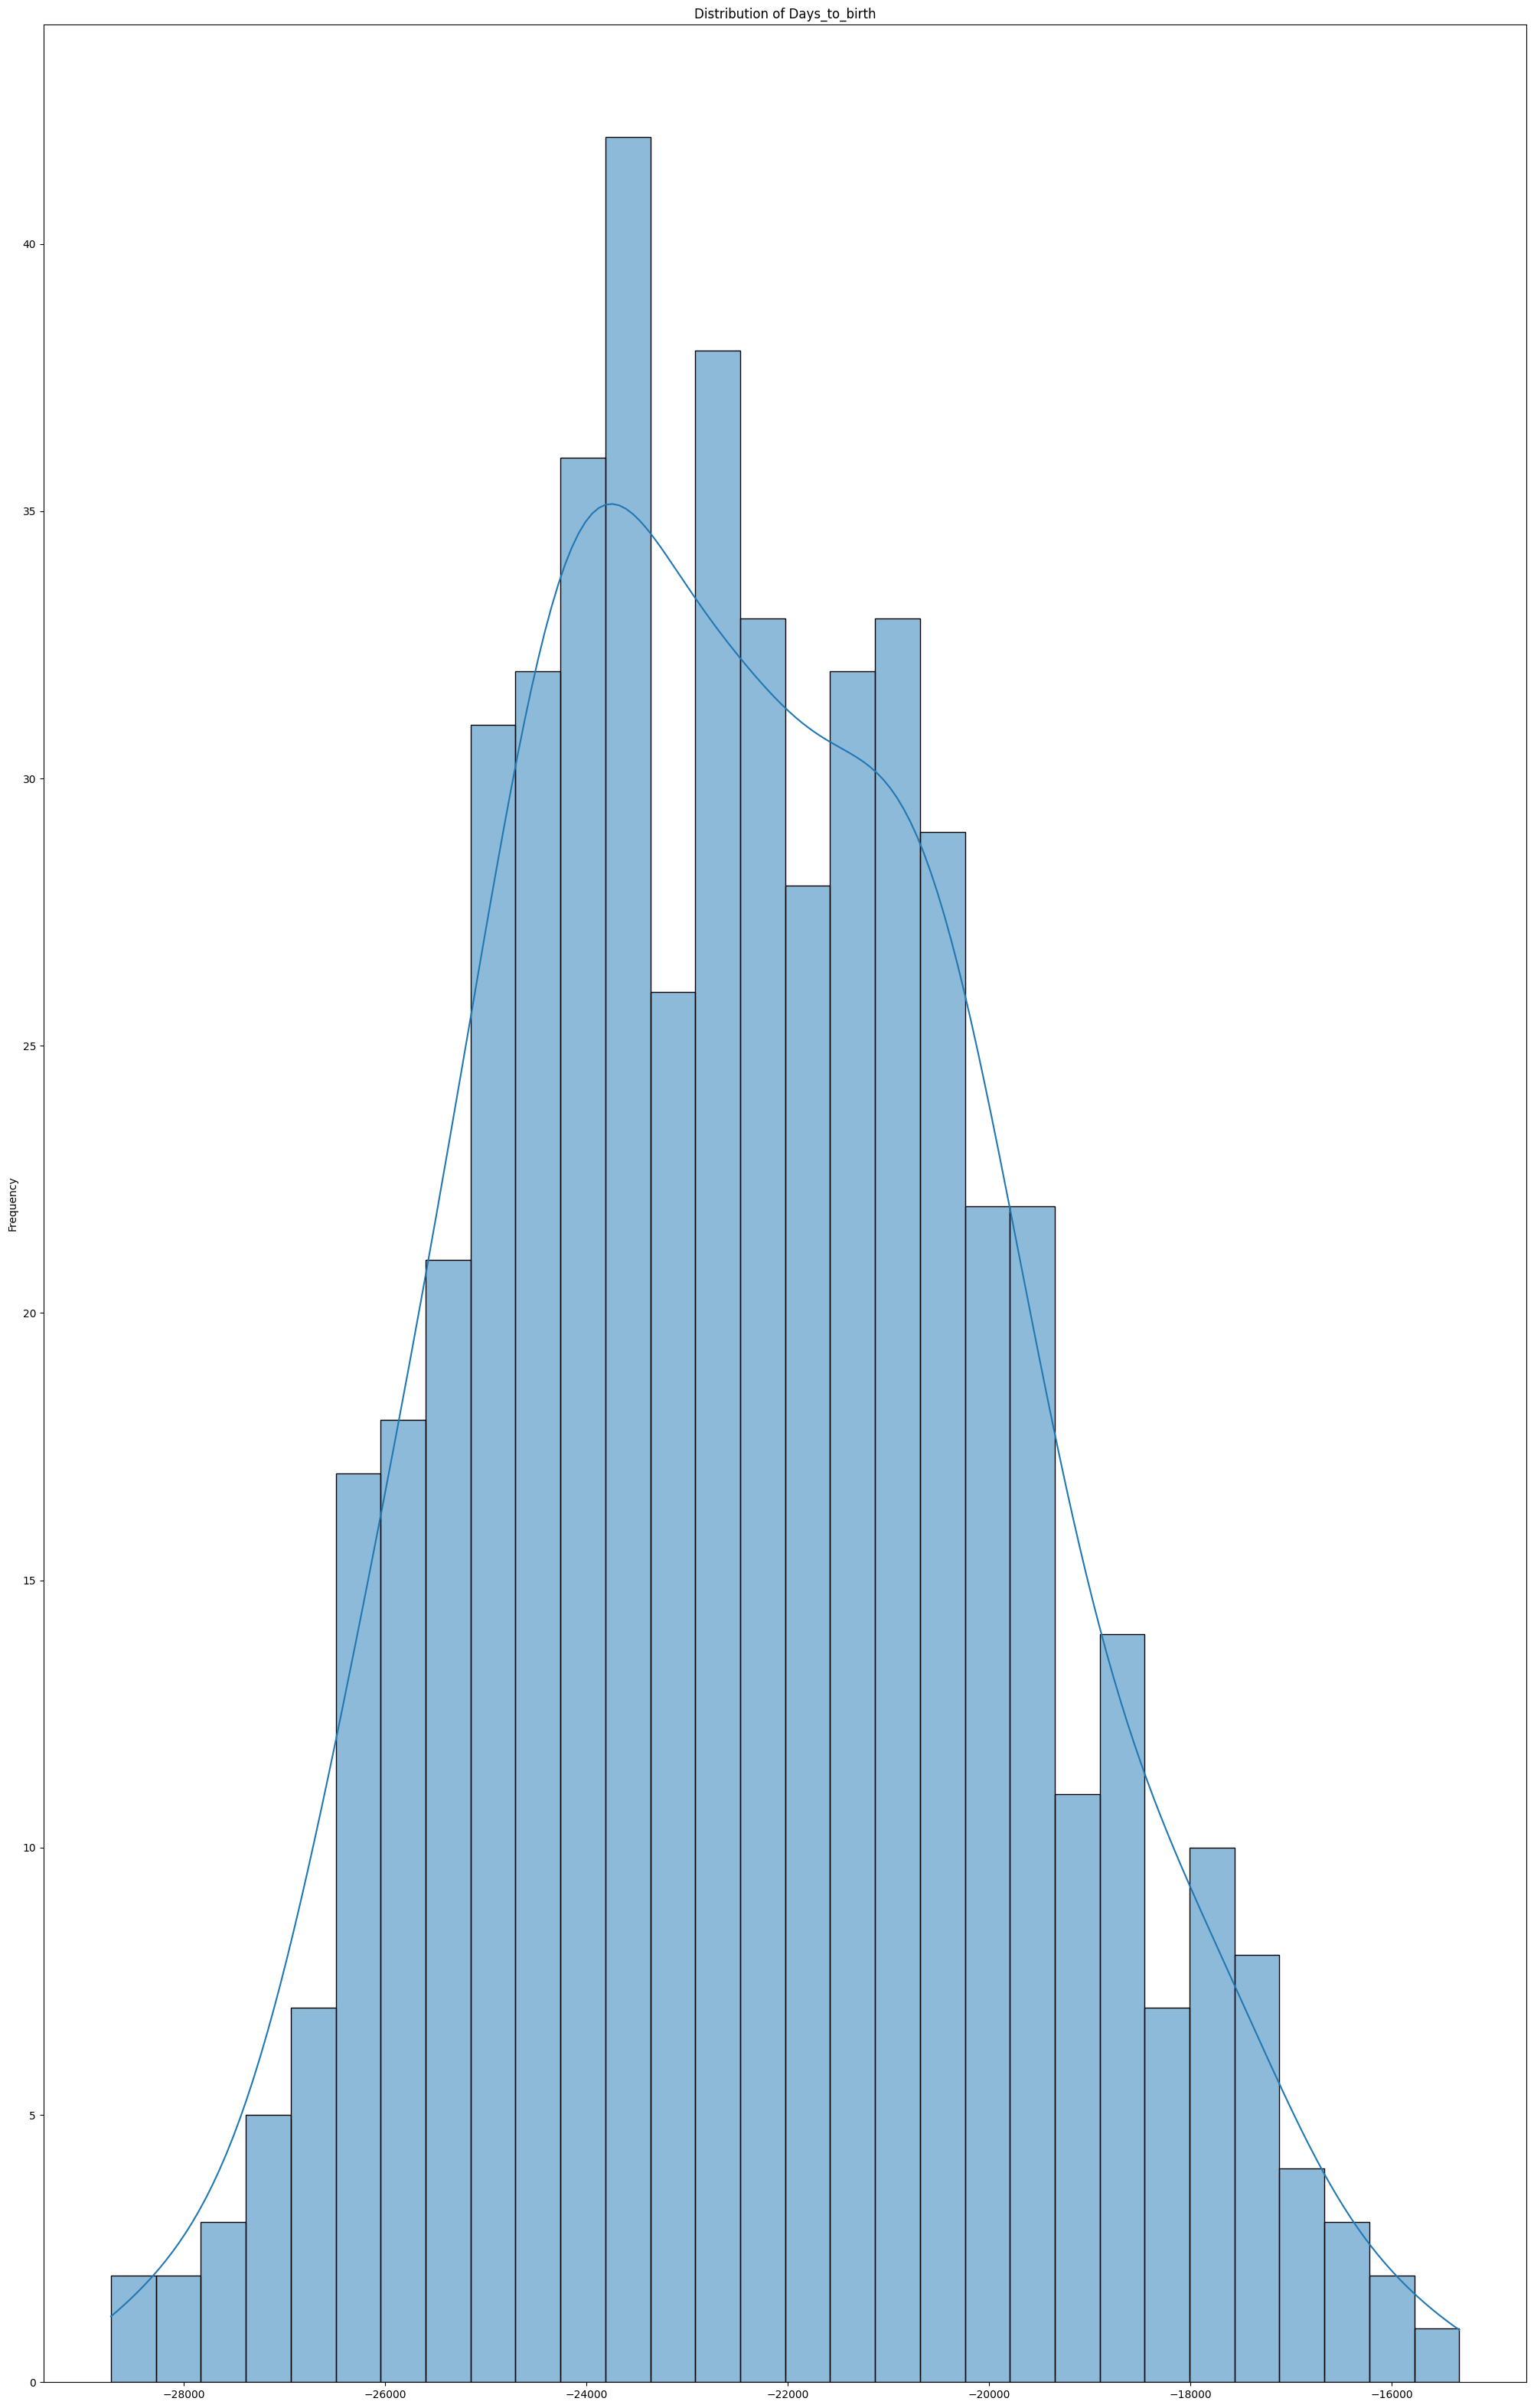

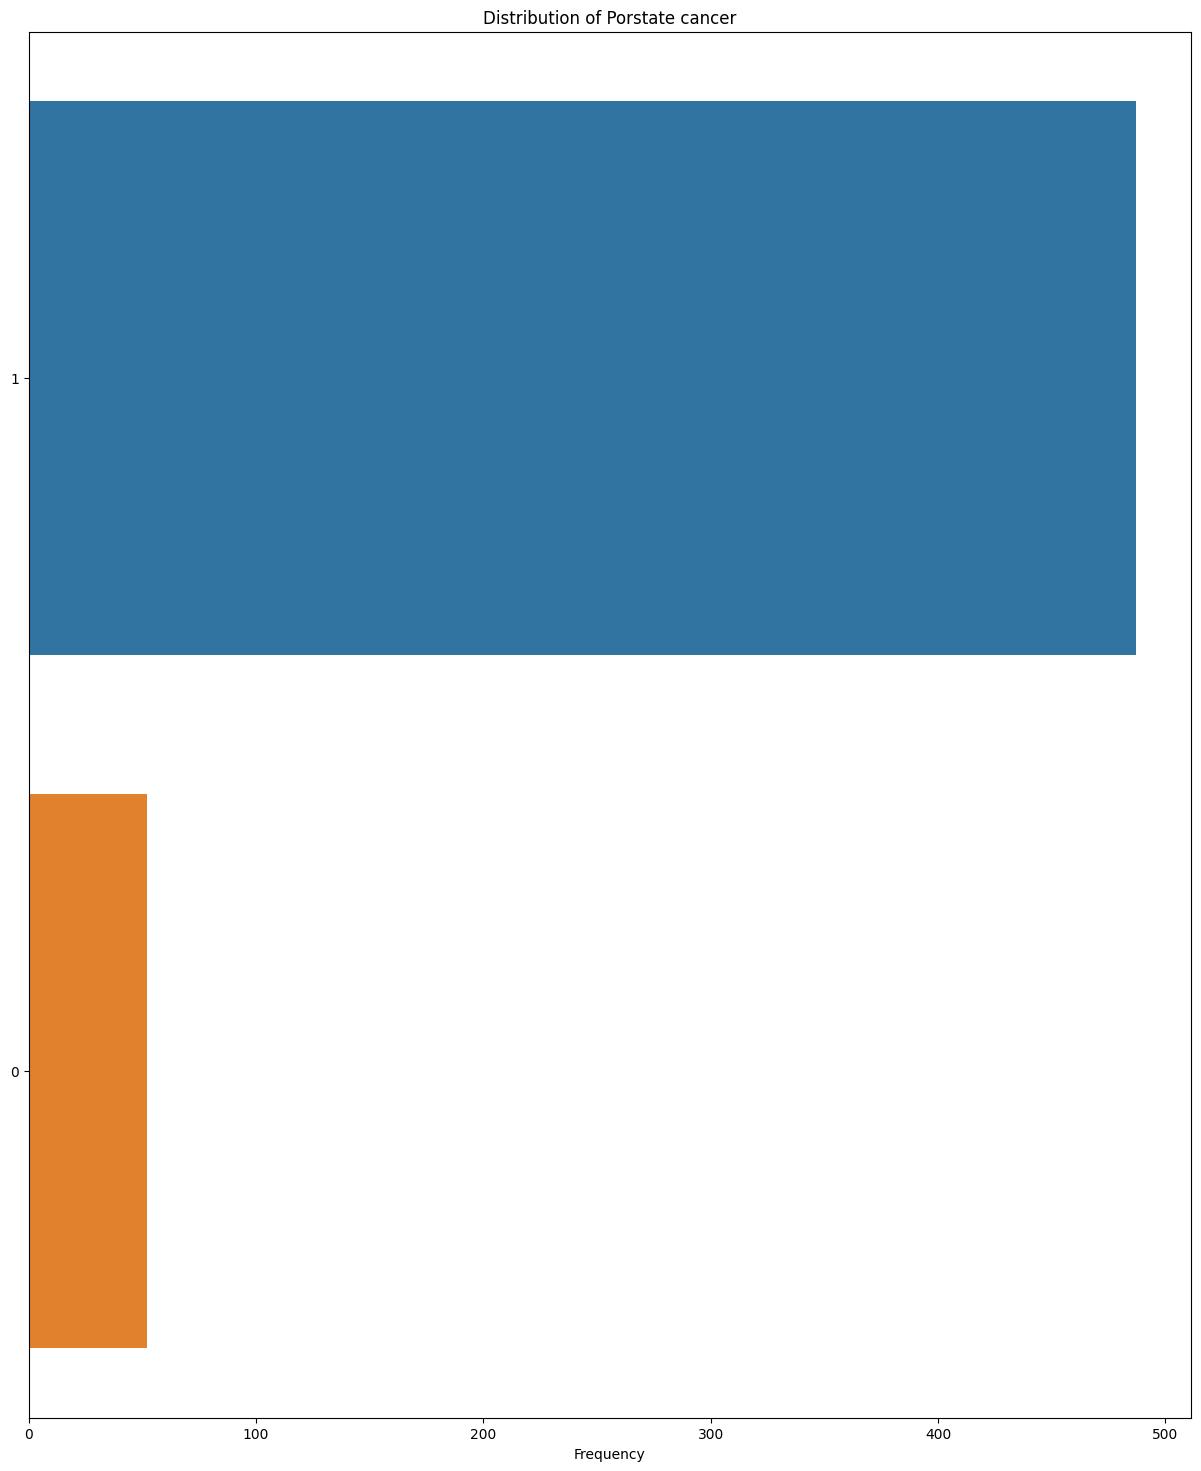

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(25, 40))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(15, 18))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

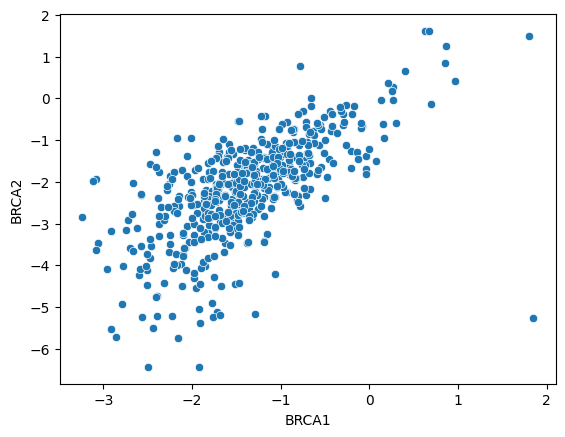

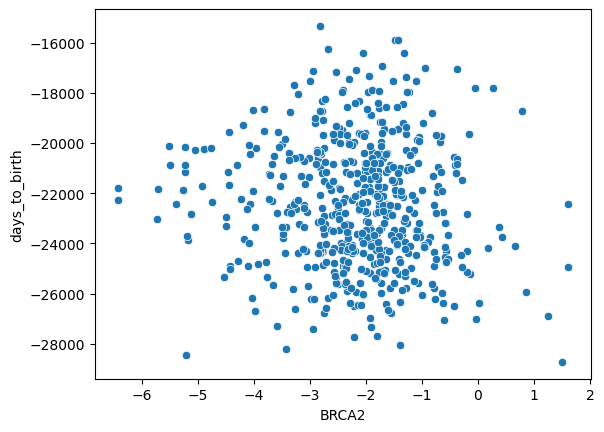

In [27]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

In [28]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Porstate Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,51,-0.529292,1.057174,-0.531035,0.618328,0.190622,0.81449,0.190406,0.636354,-0.423399,...,-0.565717,-1.980333,-1.28139,-0.440177,1.163814,-1.480327,-0.571195,1.802067,1.151488,1
TCGA-2A-A8VO-01,57,-0.758992,1.607474,-0.531035,0.457328,-0.006778,0.08739,0.116506,0.655854,-0.423399,...,0.731283,-1.019233,-1.28139,-0.325877,0.675314,-0.336327,-0.120095,2.618067,0.785288,1
TCGA-2A-A8VT-01,47,-0.205792,-0.895626,-0.531035,0.330028,0.326922,0.00119,0.008406,-0.469046,0.371801,...,-0.282217,-1.477333,-1.28139,-1.004377,-0.853486,-0.619527,-0.764495,1.723367,0.400188,1
TCGA-2A-A8VV-01,52,-0.697292,1.133574,-0.531035,0.807328,-0.273778,0.17979,0.243206,-0.175046,-0.423399,...,-0.630117,-1.643033,-1.28139,-0.389677,0.959814,-1.920727,-0.447995,2.168967,0.419888,1
TCGA-2A-A8VX-01,70,-0.847392,1.244074,-0.531035,0.677428,0.161422,0.57909,0.142406,-1.165446,0.165201,...,-0.998517,-2.466333,-1.28139,-0.421977,0.017714,-3.027827,-1.182695,-0.682033,0.891288,1


In [29]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        binary_predictions = (predictions > 0.5).astype(int)

        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_8532\1545064521.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std
D:\Anaconda3\lib\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in true_divide
  ts = beta / np.sqrt(var * sigma)
D:\Anaconda3\lib\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.599510874312167


In [30]:
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [31]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For HOXB13:

For age:
age: Coefficient = -0.013551599407337751, p-value = 0.21138874519690262



In [32]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between HOXB13 Gene and Porstate Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the HOXB13 Gene and Porstate Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the HOXB13 Gene and Porstate Cancer when considering the influence of age.




In [37]:
threshold = 10
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: age
Coefficient is negative, and it is statistically significant (p-value < 10).




In [38]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:


